<a href="https://colab.research.google.com/github/LiadTssf/cloud-project/blob/main/ex4/exe4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import json
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Replace 'path_to_your_file.json' with the actual path to your JSON file
file_path = '/content/drive/My Drive/data.json'

# Load JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

Dropdown(description='Filter by:', options=('Document', 'Tab', 'User', 'Description', 'Time'), value='Document…

Dropdown(description='Value:', options=(), value=None)

Button(description='Update Graph', style=ButtonStyle())

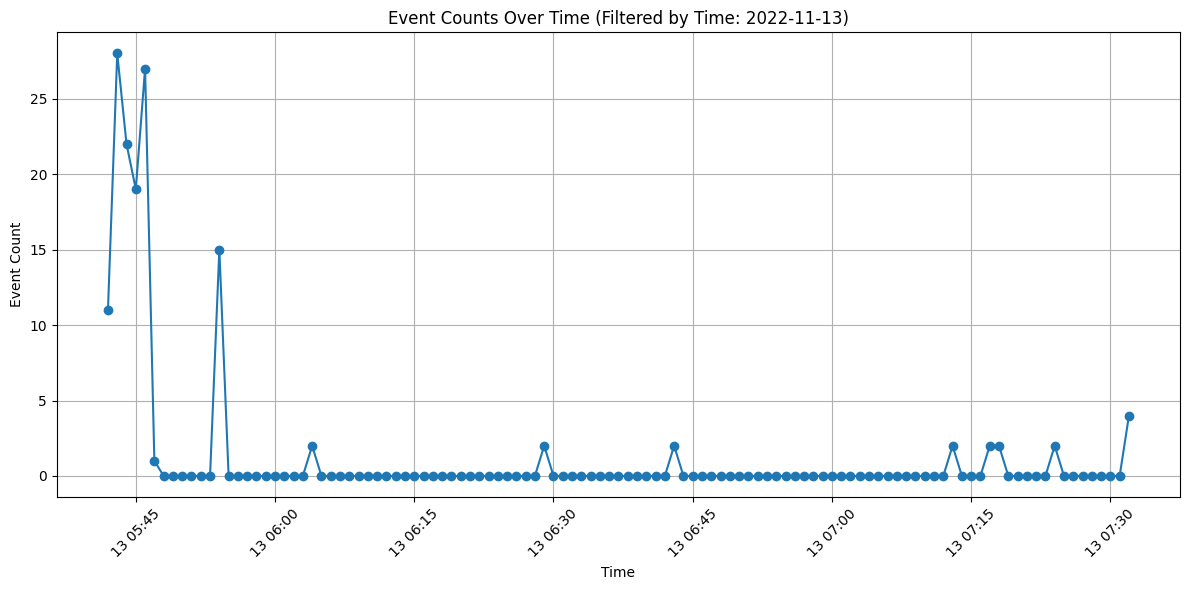

In [64]:
# Create a dropdown for selecting the filter type
filter_type_dropdown = widgets.Dropdown(
    options=['Document', 'Tab', 'User', 'Description', 'Time'],
    description='Filter by:'
)

# Create an empty dropdown for the specific filter value, will be populated based on filter type
filter_value_dropdown = widgets.Dropdown(description='Value:')

# Create a button to update the graph
update_button = widgets.Button(description='Update Graph')

# Display widgets
display(filter_type_dropdown, filter_value_dropdown, update_button)

In [65]:
# Function to update the filter values dropdown based on selected filter type
def update_filter_values(change):
    filter_type = filter_type_dropdown.value
    if filter_type == 'Time':
        filter_value_dropdown.options = list(df['Time'].dt.date.unique())
    else:
        filter_value_dropdown.options = df[filter_type].unique()

# Attach the function to filter type dropdown change event
filter_type_dropdown.observe(update_filter_values, names='value')

# Function to update the graph based on the selected filter
def update_graph(b):
    filter_type = filter_type_dropdown.value
    filter_value = filter_value_dropdown.value

    if filter_type == 'Time':
        # Handle time filtering differently
        filtered_df = df[df['Time'].dt.date == pd.to_datetime(filter_value).date()]
    else:
        filtered_df = df[df[filter_type] == filter_value]

    # Resample to 1-minute intervals
    event_counts = filtered_df.resample('T', on='Time').size()

    # Plot the event counts
    plt.figure(figsize=(12, 6))
    plt.plot(event_counts.index, event_counts.values, marker='o')
    plt.xlabel('Time')
    plt.ylabel('Event Count')
    plt.title(f'Event Counts Over Time (Filtered by {filter_type}: {filter_value})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Attach the function to the button click event
update_button.on_click(update_graph)